In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix



In [31]:
# Load the datasets
train_data = pd.read_csv('carinsurance_train.csv')
test_data = pd.read_csv('carinsurance_test.csv')



In [32]:

# Preview the data
print("Train Data:")
print(train_data.head())
print("\nTest Data:")
print(test_data.head())



Train Data:
   Id  Age          Job  Marital Education  Default  Balance  HHInsurance  \
0   1   32   management   single  tertiary        0     1218            1   
1   2   32  blue-collar  married   primary        0     1156            1   
2   3   29   management   single  tertiary        0      637            1   
3   4   25      student   single   primary        0      373            1   
4   5   30   management  married  tertiary        0     2694            0   

   CarLoan Communication  LastContactDay LastContactMonth  NoOfContacts  \
0        0     telephone              28              jan             2   
1        0           NaN              26              may             5   
2        0      cellular               3              jun             1   
3        0      cellular              11              may             2   
4        0      cellular               3              jun             1   

   DaysPassed  PrevAttempts  Outcome CallStart   CallEnd  CarInsurance  
0

In [33]:
# Drop unnecessary columns (e.g., Id, CallStart, CallEnd)
columns_to_drop = ['Id', 'CallStart', 'CallEnd']
train_data = train_data.drop(columns=columns_to_drop, errors='ignore')
test_data = test_data.drop(columns=columns_to_drop, errors='ignore')



In [34]:
# Handle missing values
train_data.fillna(train_data.median(numeric_only=True), inplace=True)
test_data.fillna(test_data.median(numeric_only=True), inplace=True)



In [35]:
# Encode categorical variables using LabelEncoder
categorical_columns = ['Job', 'Marital', 'Education', 'Communication', 'Outcome', 'LastContactMonth']

label_encoder = LabelEncoder()
for col in categorical_columns:
    if col in train_data.columns:
        train_data[col] = label_encoder.fit_transform(train_data[col].astype(str))
    if col in test_data.columns:
        test_data[col] = label_encoder.transform(test_data[col].astype(str))



In [36]:
# Split train_data into features and target
X = train_data.drop('CarInsurance', axis=1)
y = train_data['CarInsurance']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [37]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)



In [38]:
# Prepare the test data (ensure it has the same features as the training data)
X_test = test_data.drop(columns=['CarInsurance'], errors='ignore')  # Drop target column from test data
X_test = scaler.transform(X_test)  # Standardize the test data



In [39]:
# Build and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence warning occurs
model.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [40]:
# Predictions
y_val_pred = model.predict(X_val)
test_predictions = model.predict(X_test)



In [41]:
# Evaluate the model
print("Validation Set Metrics:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))



Validation Set Metrics:
Accuracy: 0.675
Confusion Matrix:
 [[406  73]
 [187 134]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.85      0.76       479
           1       0.65      0.42      0.51       321

    accuracy                           0.68       800
   macro avg       0.67      0.63      0.63       800
weighted avg       0.67      0.68      0.66       800



In [42]:
# Save the test predictions
test_data['CarInsurance'] = test_predictions
test_data.to_csv('carinsurance_predictions.csv', index=False)

print("Predictions saved to 'carinsurance_predictions.csv'")

Predictions saved to 'carinsurance_predictions.csv'


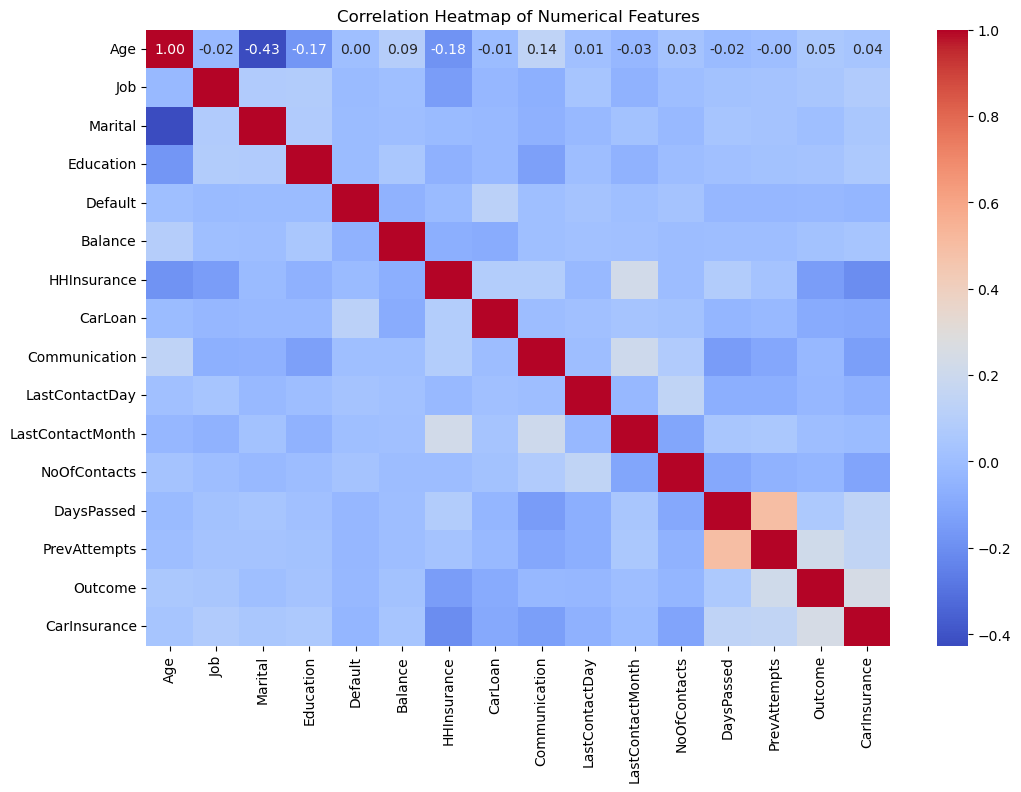

In [43]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

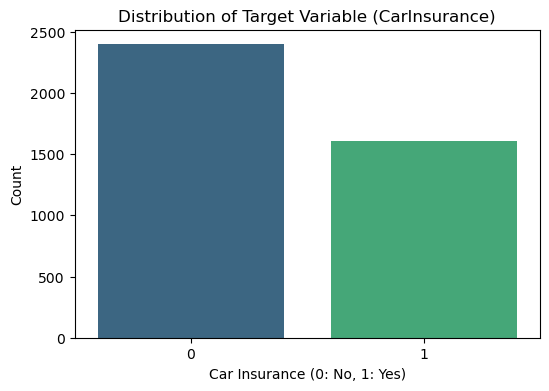

In [44]:
# Distribution of target variable in training data
plt.figure(figsize=(6, 4))
sns.countplot(x='CarInsurance', data=train_data, palette='viridis')
plt.title("Distribution of Target Variable (CarInsurance)")
plt.xlabel("Car Insurance (0: No, 1: Yes)")
plt.ylabel("Count")
plt.show()

D:\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


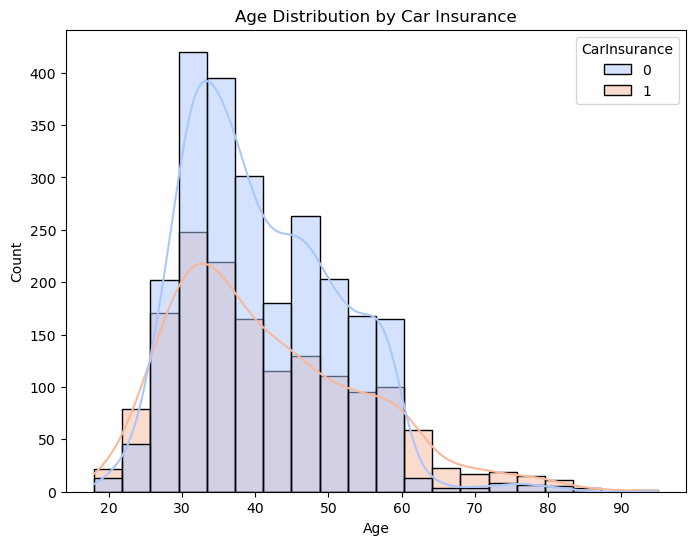

In [45]:
# Age distribution by CarInsurance in training data
plt.figure(figsize=(8, 6))
sns.histplot(data=train_data, x="Age", hue="CarInsurance", kde=True, palette="coolwarm", bins=20)
plt.title("Age Distribution by Car Insurance")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

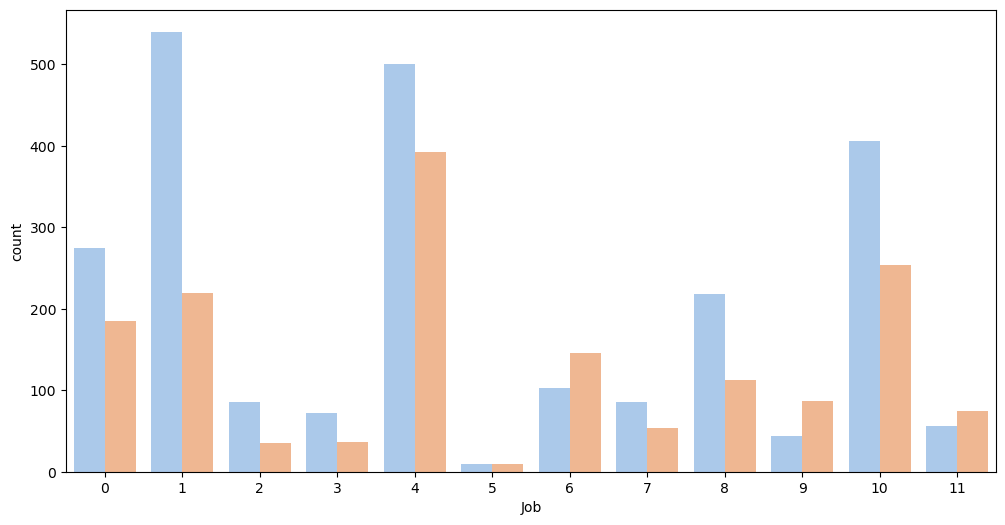

In [46]:
# Job category vs CarInsurance in training data
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='Job', hue='CarInsurance', palette='pastel')
plt.title("Job Category vs Car Insurance")
plt.xlabel("Job")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

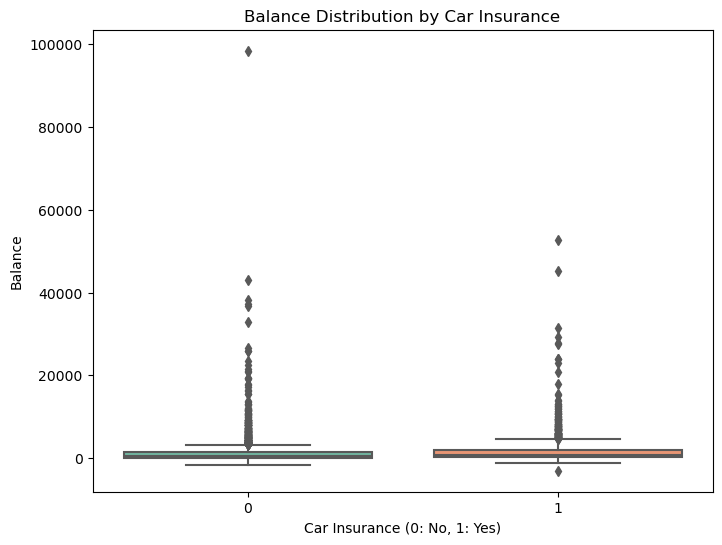

In [47]:
# Balance distribution by CarInsurance in training data
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_data, x='CarInsurance', y='Balance', palette="Set2")
plt.title("Balance Distribution by Car Insurance")
plt.xlabel("Car Insurance (0: No, 1: Yes)")
plt.ylabel("Balance")
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

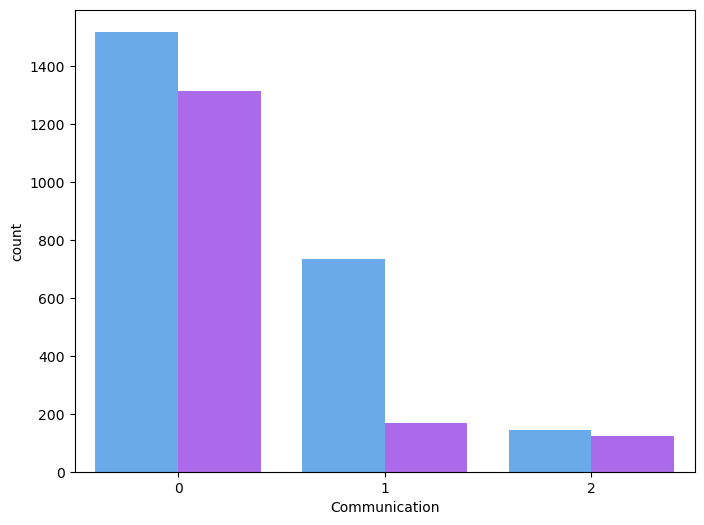

In [48]:
# Contact method distribution in training data
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='Communication', hue='CarInsurance', palette='cool')
plt.title("Contact Method vs Car Insurance")
plt.xlabel("Communication Method")
plt.ylabel("Count")
plt.show()

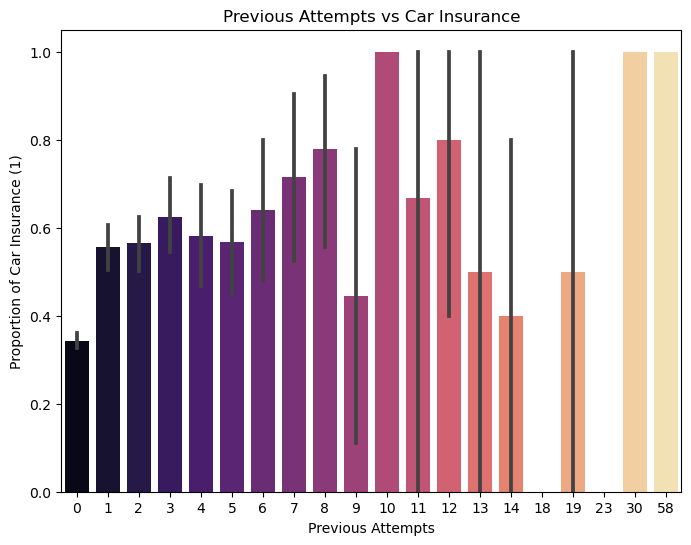

In [49]:
# Previous attempts vs CarInsurance in training data
plt.figure(figsize=(8, 6))
sns.barplot(data=train_data, x='PrevAttempts', y='CarInsurance', palette='magma')
plt.title("Previous Attempts vs Car Insurance")
plt.xlabel("Previous Attempts")
plt.ylabel("Proportion of Car Insurance (1)")
plt.show()